# Managing Financial Data
In this notebook, we import financial data from several sources (files or from the web) and explore it further.

## Importing from csv files
---

In [1]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display first 10 rows
print(nasdaq.head(5))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Importing from Excel sheets
---
### Importing a single sheet

In [2]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Importing several sheets

In [3]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Combining several excel sheets into one dataframe

In [4]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

listings = []

for item in exchanges:
    listing = pd.read_excel(xls, sheetname=item, na_values='n/a')
    listing['Exchange'] = item
    listings.append(listing)

combined_listings = pd.concat(listings)

combined_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


## Importing from the web (DataReader)
---
### Importing using Yahoo as data source

In [5]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'yahoo'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-31  107.010002  107.029999  104.820000  105.260002  101.339394   
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.426033   
2016-01-05  105.750000  105.849998  102.410004  102.709999   98.884369   
2016-01-06  100.559998  102.370003   99.870003  100.699997   96.949242   
2016-01-07   98.680000  100.129997   96.430000   96.449997   92.857529   

              Volume  
Date                  
2015-12-31  40635300  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-31 to 2016-12-30
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null i

### Plotting the data

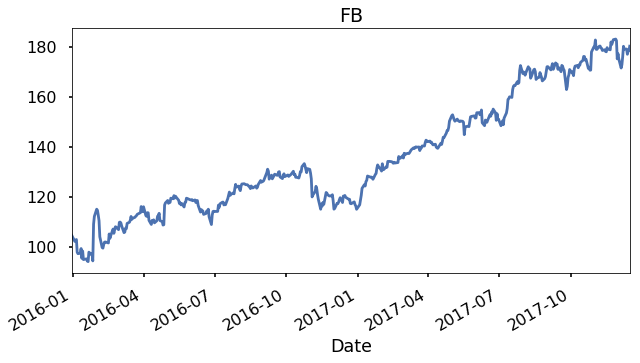

In [48]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# Set start and end dates
start = date(2016,1,1)
end = date.today()

# Set the ticker and data_source
ticker = 'FB'
data_source = 'yahoo'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker, figsize=(10,5))

# Show the plot
plt.show()

### Importing using FRED as data source
FRED = Federal Reserve Economic Data

Let's import the data for the 10-Year Treasury Constant Maturity Rate (DGS10).  See [here](https://fred.stlouisfed.org/series/DGS10)

In [8]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'DGS10'

# Set the data source
data_source = 'fred'

# Import the stock prices
dgs10 = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(dgs10.head())
dgs10.info()

            DGS10
DATE             
2016-01-01    NaN
2016-01-04   2.24
2016-01-05   2.25
2016-01-06   2.18
2016-01-07   2.16
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2016-01-01 to 2016-12-30
Data columns (total 1 columns):
DGS10    250 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


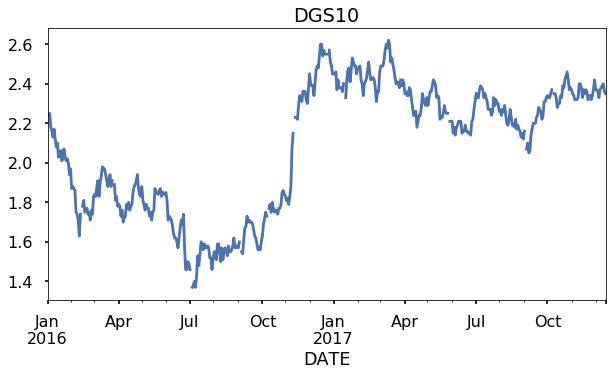

In [49]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
#end = date.today() # not necessary

# Set the ticker and data_source
ticker = 'DGS10'
data_source = 'fred'

# Import the data using DataReader
dgs10 = DataReader(ticker, data_source, start, end)

# Plot Close
dgs10['DGS10'].plot(title=ticker, figsize=(10,5))

# Show the plot
plt.show()

## Combining stock and economic data
---
### Oil price vs Exxon stock

In [28]:
start = date(2000,1,1)

oil = DataReader('DCOILWTICO', 'fred', start) # West Texas Intermediate Oil Price

ticker = 'XOM' # Exxon Mobile Corporation

stock = DataReader(ticker, 'yahoo', start)

data = pd.concat([stock[['Close']], oil], axis=1) # We concatenate both dataframe horizontally, aligned on the index (date)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4686 entries, 1999-12-31 to 2017-12-15
Freq: B
Data columns (total 2 columns):
Close         4520 non-null float64
DCOILWTICO    4507 non-null float64
dtypes: float64(2)
memory usage: 109.8 KB


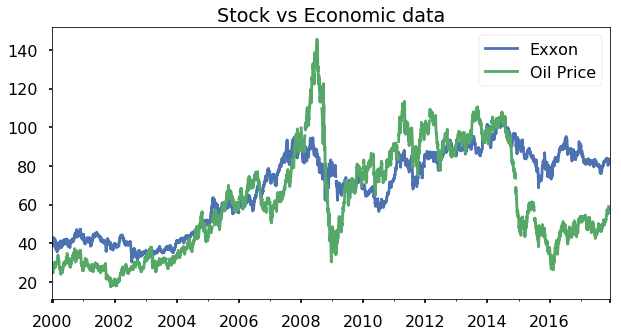

In [50]:
# Let's rename the columns
data.columns = ['Exxon', 'Oil Price']

# Let's plot both columns
data.plot(figsize=(10,5))
plt.legend()
plt.title('Stock vs Economic data')
plt.show()

### Gold Price

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12970 entries, 1968-04-01 to 2017-12-15
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12572 non-null float64
dtypes: float64(1)
memory usage: 202.7 KB


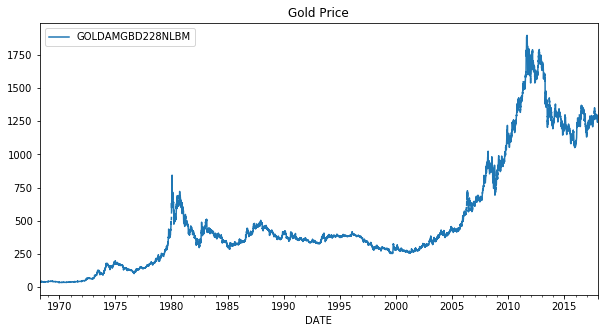

In [40]:
# Set start date
start = date(1968,1,1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price', figsize=(10,5))

# Show the plot
plt.show()

### Unemployment Rate vs Labor Market participation
Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

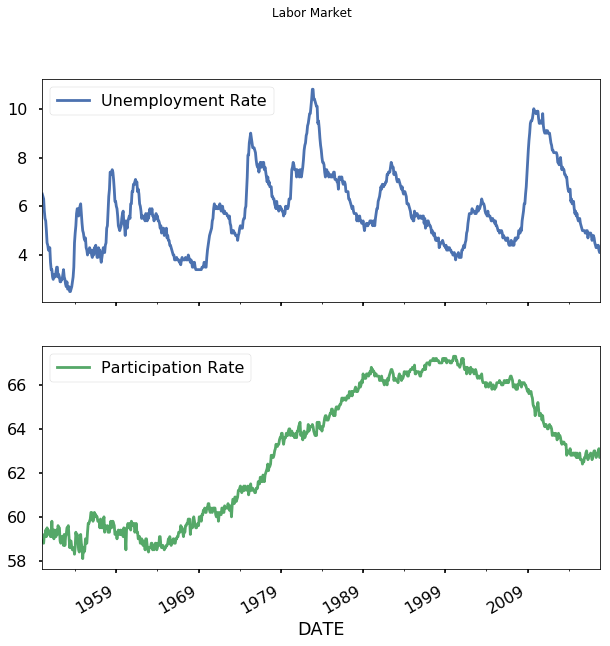

In [51]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market', figsize=(10,10))

# Show the plot
plt.show()

In [44]:
# To be continued